### Topic Modeling Analysis
Felix Funes 20220306 | Paula Catalan 20221048 | Efstathia Styliagkatzi 20220078 | Alisson Tapia 20221156 | S M Abrar Hossain Asif 20220223


Topic modeling analysis offers valuable insights in various ways:

Uncovering underlying themes: Topic modeling allows for the discovery of latent themes or topics within a collection of documents. It reveals patterns and structures in large text datasets, eliminating the need for manual reading and categorization of each document.

Enhancing understanding of text corpora: Dealing with large amounts of text data can be overwhelming. Topic modeling helps by summarizing and organizing textual information into meaningful topics, facilitating exploration and comprehension of the dataset.

Enabling content recommendation and information retrieval: Topic modeling supports content recommendation systems by suggesting relevant items based on extracted topics from user preferences or queries. This improves search engines, recommender systems, and personalized content delivery by matching users' interests with relevant topics.

Facilitating text clustering and document classification: By assigning documents to different topics, topic modeling enables text clustering and document classification. It groups similar documents together based on thematic content, facilitating organization, retrieval, and analysis of the text data.

Driving market research and customer insights: Topic modeling can be applied to customer reviews, feedback, or social media data to identify prevalent topics and sentiments. It provides businesses with insights into customer preferences, concerns, and trends, aiding in product development, marketing strategies, and customer satisfaction analysis.

Supporting exploratory data analysis: Topic modeling serves as a powerful tool for exploratory data analysis. It offers a quick overview of the main themes present in a text dataset, identifies outliers or anomalies, and highlights areas for further investigation or research.

In [1]:
!pip uninstall -y numpy
!pip install numpy


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\asifa\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\asifa\anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "C:\Users\asifa\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "C:\Users\asifa\anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "C:\Users\asifa\anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "C:\Users\asifa\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Users\asifa\anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self.iter(r

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
pandas-profiling 3.3.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
pandas-profiling 3.3.0 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
pandas-profiling 3.3.0 requires pandas!=1.4.0,<1.5,>1.1, but you have pandas 2.0.2 which is incompatible.
pandas-profiling 3.3.0 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


In [2]:
# Import packages
!pip install --user gensim

import csv
import pandas as pd
import numpy as np
import nltk 
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

import gensim         
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
#import pyLDAvis.gensim

# For pyLDAvis new version - replace the previous line
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


import matplotlib.pyplot as plt

In [6]:
!pip install pyLDAvis
import spacy

import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
pandas-profiling 3.3.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
pandas-profiling 3.3.0 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
pandas-profiling 3.3.0 requires pandas!=1.4.0,<1.5,>1.1, but you have pandas 2.0.2 which is incompatible.
pandas-profiling 3.3.0 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


NameError: name 'pyLDAvis' is not defined

In [3]:
# Just because of versions on my computer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
# Load dataset
dtypes = {'type':'category','subreddit':'category','score':'float64','title':'category','reviews':'category','author':'category'}
ds= pd.read_excel("reddit_FINAL_v12.xlsx", sheet_name="Sheet1", engine='openpyxl', dtype=dtypes)

In [5]:
# Text preprocessing
def textPreProcess(rawText, removeHTML=True, charsToRemove = r'\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-', removeNumbers=True, removeLineBreaks=False, specialCharsToRemove = r'[^\x00-\xfd]', convertToLower=True, removeConsecutiveSpaces=True):
    if type(rawText) != str:
        return rawText
    procText = rawText
        
    # Remove HTML
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()

    # Remove punctuation and other special characters
    if len(charsToRemove)>0:
        procText = re.sub(charsToRemove,' ',procText)

    # Remove numbers
    if removeNumbers:
        procText = re.sub(r'\d+',' ',procText)

    # Remove line breaks
    if removeLineBreaks:
        procText = procText.replace('\n',' ').replace('\r', '')

    # Remove special characters
    if len(specialCharsToRemove)>0:
        procText = re.sub(specialCharsToRemove,' ',procText)

    # Normalize to lower case
    if convertToLower:
        procText = procText.lower() 

    # Replace multiple consecutive spaces with just one space
    if removeConsecutiveSpaces:
        procText = re.sub(' +', ' ', procText)

    return procText

In [6]:
# Tokenize words
def tokenize_words(words):
    if (type(words) != str) or (word_tokenize(words) == ''):
        return np.nan
    else:
        return word_tokenize(words)

In [7]:
# Function to create text from words
def recreateText(words):
    if type(words) == list:
        temp_str = (' ').join(words)
        return temp_str
    else:
        return np.nan

In [8]:
# Function to remove stop words
def removeStopWords(t, stop_words):
    if type(t) == list:
        return [w for w in t if not w in stop_words]
    else:
        return np.nan

In [9]:
# Function to lemmatize words
def lemmatize(words):
    if type(words) == list:
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(x) for x in words]
    else:
        return np.nan

In [10]:
dtypes = {'type':'category','subreddit':'category','score':'float64','title':'category','reviews':'category','author':'category'}
ds= pd.read_excel("reddit_FINAL_v12.xlsx", sheet_name="Sheet1", engine='openpyxl', dtype=dtypes)
print(ds.columns)  # Check column names

Index(['type', 'subreddit', 'title', 'reviews', 'author', 'date_published',
       'score'],
      dtype='object')


In [12]:
# Create a dataframe with only the description
processedReviews = pd.DataFrame(data=ds.reviews.apply(textPreProcess).values, index=ds.index, columns=['PreProcessedText'])

C:\Users\asifa\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://iaohi.com/products/aohi-magcube-65w-pd-fast-charger" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\asifa\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://preview.redd.it/yqvdvjj1r8wa1.jpeg?width=640&format=pjpg&auto=webp&v=enabled&s=10f145dc1c4c69eb3b08c6716b4ab2676564fe19" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [13]:
# Create a dataframe with only the description
processedReviews = pd.DataFrame(data=ds.reviews.apply(textPreProcess).values, index=ds.index, columns=['PreProcessedText'])

C:\Users\asifa\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://iaohi.com/products/aohi-magcube-65w-pd-fast-charger" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\asifa\anaconda3\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://preview.redd.it/yqvdvjj1r8wa1.jpeg?width=640&format=pjpg&auto=webp&v=enabled&s=10f145dc1c4c69eb3b08c6716b4ab2676564fe19" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [14]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asifa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asifa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
# Tokekinze words
processedReviews['Words'] =  processedReviews['PreProcessedText'].apply(tokenize_words)

# Remove stopwords
stop_words = set(stopwords.words('english'))
processedReviews['WordsCleaned'] = processedReviews['Words'].apply(removeStopWords,stop_words=stop_words)

# Remove all reviews with no words
processedReviews = processedReviews[processedReviews['WordsCleaned'].str.len()>0]

# Lemmative words
processedReviews['WordsLemmatized'] = processedReviews['WordsCleaned'].apply(lemmatize)

In [16]:
# Create dictionary (needed for LDA)
id2word = corpora.Dictionary(processedReviews['WordsLemmatized'])

In [17]:
# Create corpus
corpus = processedReviews['WordsLemmatized']

In [18]:
# Create TDM (Frequency)
tdm = [id2word.doc2bow(text) for text in corpus]

In [19]:
# Build LDA model (can take from 2 to 10 minutes depending on the computer)
lda_model = gensim.models.ldamodel.LdaModel(corpus=tdm,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=123,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
# Print the keywords in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[tdm]
# Interpretation: Topic 0 is represented as 0.055"walking" + 0.054"garden" + ...

[(0, '0.064*"phone" + 0.026*"need" + 0.023*"icloud" + 0.022*"use" + 0.020*"iphone" + 0.018*"want" + 0.014*"get" + 0.014*"apps" + 0.013*"got" + 0.012*"backup"'), (1, '0.040*"carrier" + 0.037*"sim" + 0.036*"esim" + 0.022*"phone" + 0.021*"[" + 0.021*"]" + 0.021*"know" + 0.020*"apple" + 0.015*"support" + 0.014*"take"'), (2, '0.044*"photo" + 0.026*"device" + 0.024*"think" + 0.023*"right" + 0.017*"like" + 0.016*"check" + 0.015*"thank" + 0.014*"video" + 0.014*"make" + 0.013*"show"'), (3, '0.026*"e" + 0.024*"http" + 0.021*"call" + 0.021*"someone" + 0.019*"sound" + 0.019*"%" + 0.019*"every" + 0.018*"fine" + 0.017*"//www" + 0.013*"lol"'), (4, '0.025*"u" + 0.023*"since" + 0.022*"problem" + 0.020*"case" + 0.017*"thanks" + 0.016*"http" + 0.016*"review" + 0.015*"battery" + 0.015*"thing" + 0.013*"good"'), (5, '0.034*"iphone" + 0.031*"new" + 0.026*"phone" + 0.024*"work" + 0.023*"n\'t" + 0.021*"get" + 0.019*"apple" + 0.018*"esim" + 0.016*"one" + 0.014*"would"'), (6, '0.063*"*" + 0.038*"even" + 0.020*"i

In [21]:
# Visualize the topics (can take some mintues to run)
#vis = pyLDAvis.gensim.prepare(lda_model, tdm, id2word)
#pyLDAvis.show(vis)

# If it is a newwer version of puLDavis, use this instead of the previous
vis = gensimvis.prepare(lda_model, tdm, id2word)
pyLDAvis.display(vis)

#pyLDAvis.enable_notebook() # Remove remarks to see in notebook instead of the browser

### Insights of graphs:
The LDA model identifies eight topics (as specified by num_topics=8) and assigns keywords to each topic. The keywords provide an insight into the main themes or areas of discussion in the analyzed dataset. Each topic is represented by a list of words and their corresponding weights.

We can see here that in Topic 1 there are several words that show a higher weight. Some of them are:"work", "esim","app", "time" and "charge". The weight of a keyword indicates the likelihood of that word occurring in the given topic. The higher the weight, the more representative and important the word is for the topic.

In topic 2 we can see that the words that have more weight are: "screen", "button" , "gb", and "use", which complements the previous insights that we got from the other analysis within Best Buy and Reddit.

In [25]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(tdm))  # lower value is better (some liteture do not recommend the use of this measure)


Perplexity:  -7.667577983872887


In [26]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3927006689358542


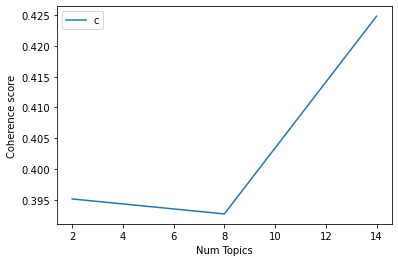

In [27]:
# HOW TO SELECT K (based on https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=123,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# ATTENTION!!!! Can take a LONG time to run.
lowerBound = 2
upperBound = 20
step = 6
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=tdm, texts=corpus, start=lowerBound, limit=upperBound, step= step)

# Show graph
x = range(lowerBound, upperBound, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# The coherence score is decreasing. A higher value should be chosen, because as K increases the probability of having repeated keywords increases.
# ...So, in this case we may choose 8, as there is an inflaction at K=8

### Insights from the graph:
This code snippet computes the perplexity of an LDA (Latent Dirichlet Allocation) model. The perplexity is a measure of how well the model predicts a sample or a set of documents. A lower perplexity value indicates better performance.

Then code calculates the coherence score of an LDA model. Coherence is a measure of the interpretability and consistency of the topics generated by the model. The code creates a CoherenceModel object with the LDA model (lda_model), the corpus, the dictionary, and the coherence measure ('c_v'). The coherence score is obtained using the get_coherence method of the coherence_model_lda object. The code then prints the coherence score.

Finally the code defines a function called compute_coherence_values that computes the coherence values for different numbers of topics in an LDA model. The function takes in a Gensim dictionary, a Gensim corpus, a list of input texts, a limit on the maximum number of topics to consider, and the start and step values for the range of topics.

A perplexity value of -7.667577983872887 suggests a very low perplexity, which indicates that the LDA model is performing well in predicting the sample or set of documents. Lower perplexity values generally indicate better model performance. In this case, the negative value may be due to the logarithmic transformation typically applied to perplexity calculations. Therefore, a lower negative value still indicates a good performance.

A coherence score of 0.3927006689358542 indicates a moderate level of coherence and interpretability for the topics generated by the LDA model. Coherence scores typically range between 0 and 1, where higher values indicate better topic quality.

It also suggests that the topics have some level of coherence and are reasonably interpretable. However, there is room for improvement, as a higher coherence score would indicate more distinct and coherent topics.